In [2]:
import shapefile
from shapely.geometry import shape, Point, mapping
import numpy as np
import pandas as pd

base = "../../data/"
filename = "raw/2016_LGA_SHAPE/LGA_2016_AUST"

sf = shapefile.Reader(base+filename)

centroids = list(map(lambda x: shape(x.__geo_interface__).centroid, sf.shapes()[:130]))

df = pd.DataFrame(sf.records())
nswdf = df[df[4] =="New South Wales"]
# drop "No usual address" - not a useful LGA
nswdf = nswdf[nswdf[0] != "LGA19499"]
nswdf.columns = ["code", "codenum", "name", "unknown", "state", "unknown2"]
nswdf["clean_name"] = nswdf["name"].str.extract('([^\\(]*)', expand=False).str.strip()
nswdf['long'] = np.asarray([x.x for x in centroids])
nswdf['lat'] = np.asarray([x.y for x in centroids])
nswdf

,code,codenum,name,unknown,state,unknown2,clean_name,long,lat
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604
1,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349
2,LGA10250,10250,Ballina (A),1,New South Wales,484.9389,Ballina,153.486147,-28.852885
3,LGA10300,10300,Balranald (A),1,New South Wales,21690.6753,Balranald,143.611623,-33.950350
4,LGA10470,10470,Bathurst Regional (A),1,New South Wales,3817.8646,Bathurst Regional,149.525634,-33.430139
5,LGA10550,10550,Bega Valley (A),1,New South Wales,6278.8811,Bega Valley,149.717569,-36.825941
6,LGA10600,10600,Bellingen (A),1,New South Wales,1600.4337,Bellingen,152.728589,-30.403803
7,LGA10650,10650,Berrigan (A),1,New South Wales,2065.7759,Berrigan,145.711213,-35.734325
8,LGA10750,10750,Blacktown (C),1,New South Wales,240.0487,Blacktown,150.864351,-33.741329
9,LGA10800,10800,Bland (A),1,New South Wales,8557.6535,Bland,146.961268,-33.894344


In [3]:
#average distance between nearest neighbours
dist = []
for i in centroids:
    alldist = []
    for j in centroids:
        if i != j:
            alldist.append(i.distance(j))
    dist.append(np.min(alldist))
    
np.mean(dist)

0.46813379855385656

In [4]:
target = pd.read_csv(base+"processed/cleaned_target.csv")

In [5]:
target= target[target['Type']== 'Rate per 100,000 population']
target

,Year,Type,LGA,Assault - domestic violence,Assault - non-domestic violence,Sexual Offences,Robbery,Break and enter dwelling,Break and enter non-dwelling,Motor vehicle theft,...,Possession use of cannabis,Prohibited weapons offences,Trespass,Offensive conduct,Offensive language,Liquor offences,Breach AVO,Breach bail conditions,Resist or hinder officer,Transport regulatory offences
130,2013,"Rate per 100,000 population",Albury,548.1193,782.4602,218.4534,21.8453,641.4585,468.6817,282.0034,...,162.8470,254.2003,208.5237,303.8488,129.0861,389.2442,256.1862,1036.6604,148.9455,19.8594
131,2013,"Rate per 100,000 population",Armidale Regional,663.4881,796.8526,266.7289,33.3411,916.8806,480.1120,140.0327,...,413.4298,150.0350,226.7196,273.3971,146.7009,416.7639,316.7406,283.3995,140.0327,20.0047
132,2013,"Rate per 100,000 population",Ballina,340.7608,454.3477,198.1729,12.0837,408.4296,217.5069,120.8372,...,210.2567,79.7525,82.1693,60.4186,36.2511,116.0037,222.3404,174.0055,55.5851,2.4167
133,2013,"Rate per 100,000 population",Balranald,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,2013,"Rate per 100,000 population",Bathurst Regional,477.9646,696.1126,178.9303,36.7665,799.0588,343.1541,198.5391,...,286.7788,191.1858,200.9902,78.4352,36.7665,134.8105,218.1479,387.2739,105.3973,7.3533
135,2013,"Rate per 100,000 population",Bayside,254.7872,263.3681,79.8685,59.4063,290.4310,84.4890,200.0013,...,250.8267,93.7300,56.7661,23.7625,30.3632,34.9837,110.8918,188.7801,37.6240,1267.9952
136,2013,"Rate per 100,000 population",Bega Valley,310.9676,490.3720,146.5136,8.9702,149.5036,194.3547,89.7022,...,307.9775,134.5533,125.5831,182.3945,131.5632,340.8683,182.3945,122.5930,89.7022,0.0000
137,2013,"Rate per 100,000 population",Bellingen,193.7684,348.7831,139.5133,15.5015,286.7772,341.0324,131.7625,...,248.0236,85.2581,85.2581,38.7537,54.2552,131.7625,224.7714,85.2581,77.5074,0.0000
138,2013,"Rate per 100,000 population",Berrigan,284.9003,249.2877,130.5793,0.0000,367.9962,308.6420,47.4834,...,356.1254,296.7711,249.2877,130.5793,83.0959,284.9003,178.0627,106.8376,71.2251,0.0000
139,2013,"Rate per 100,000 population",Blacktown,574.6330,543.5301,160.7494,112.7094,525.3611,122.8717,276.5383,...,206.0179,117.9445,94.5404,24.9439,33.2585,60.3580,222.6472,641.1500,58.2024,2022.3017


In [35]:
nswdf_target.loc[:, ['lat','long', nswdf_target.columns[start_col+i]]]

,lat,long,Assault - domestic violence
0,-36.026604,146.970424,6.306493
1,-36.026604,146.970424,6.389961
2,-36.026604,146.970424,6.254090
3,-36.026604,146.970424,6.299733
4,-36.026604,146.970424,6.278380
5,-30.336349,151.829150,6.497511
6,-30.336349,151.829150,6.483683
7,-30.336349,151.829150,6.519776
8,-30.336349,151.829150,6.217540
9,-30.336349,151.829150,6.403146


In [33]:
# impute with 1, 0 is bad for log
nswdf_target = pd.merge(nswdf, target, left_on='clean_name', right_on='LGA')

nswdf_target = nswdf_target.fillna(value=0.1)
# log it
start_col = nswdf_target.columns.get_loc('Assault - domestic violence')
for i in range(27):
    nswdf_target = nswdf_target.replace(0.0, 0.1)
    nswdf_target.iloc[:,start_col+i] = np.log(nswdf_target.iloc[:,start_col+i])
nswdf_target

,code,codenum,name,unknown,state,unknown2,clean_name,long,lat,Year,...,Possession use of cannabis,Prohibited weapons offences,Trespass,Offensive conduct,Offensive language,Liquor offences,Breach AVO,Breach bail conditions,Resist or hinder officer,Transport regulatory offences
0,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2013,...,5.092811,5.538123,5.340053,5.716530,4.860480,5.964207,5.545905,6.943760,5.003580,2.988677
1,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2014,...,5.663366,5.893289,5.278103,5.364281,4.800067,5.826225,5.871430,6.620968,5.161569,3.380984
2,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2015,...,5.894212,5.793002,5.195703,5.248070,4.723546,5.288076,5.833587,6.666990,5.069822,3.371154
3,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2016,...,6.039830,5.756704,5.116667,4.981492,4.177119,5.454780,5.892505,6.916060,5.105106,2.596672
4,LGA10050,10050,Albury (C),1,New South Wales,305.9459,Albury,146.970424,-36.026604,2017,...,5.471040,5.620572,5.255929,4.913438,3.828813,5.139395,5.908254,7.211789,4.825146,3.483972
5,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2013,...,6.024488,5.010869,5.423714,5.610925,4.988396,6.032520,5.758083,5.646858,4.941876,2.995967
6,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2014,...,6.170292,5.463159,5.825452,5.294823,4.755827,5.743774,5.390134,5.531212,5.112502,1.200477
7,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2015,...,6.145525,5.500831,6.227203,5.167058,4.693273,5.500831,5.430872,5.685402,4.662502,1.196767
8,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2016,...,6.471774,5.659568,6.210939,5.200993,3.832718,4.931329,5.182643,5.600379,4.329153,2.579952
9,LGA10130,10130,Armidale Regional (A),1,New South Wales,8620.6990,Armidale Regional,151.829150,-30.336349,2017,...,5.747536,5.747536,6.021973,5.125485,4.238182,5.144903,5.236711,5.336794,3.758608,2.579952


In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.cross_validation import LeaveOneOut
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

bandwidths = np.linspace(0.01, 0.5, 100)

# 27 models for 27 crimes
best_bw = []
for i in range(2):
    #crime index - index of first crime column
    start_col = nswdf_target.columns.get_loc('Assault - domestic violence')
    
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        {'bandwidth': bandwidths},
                        cv=LeaveOneOut(len(nswdf)))
    grid.fit(nswdf_target.loc[:, ['lat','long', nswdf_target.columns[start_col+i]]])
    best_bw.append((grid.best_params_, grid.best_score_))

In [47]:
grid.best_params_

{'bandwidth': 0.059494949494949496}

In [85]:
nswdf_target.loc[:, ['lat','long', nswdf_target.columns[start_col+i]]].describe()

,lat,long,Assault - non-domestic violence
count,625.000000,625.000000,625.000000
mean,-32.976853,149.650631,5.455726
std,1.946970,2.473787,2.053850
min,-36.825941,141.479266,-2.302585
25%,-34.083345,148.065556,5.459039
50%,-33.697544,150.630295,5.943089
75%,-31.619027,151.202739,6.348186
max,-28.360000,153.486147,7.511192


KernelDensity(algorithm='auto', atol=0, bandwidth=0.059494949494949496,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

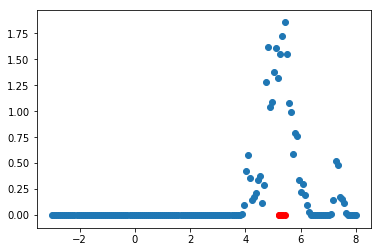

In [89]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_marginal(lga, crimetype):
    #todo, plug in CV bandwidths for each crimetype
    model = KernelDensity(kernel='gaussian', bandwidth=grid.best_params_['bandwidth'])
    loo_row_indexer = nswdf_target['clean_name']!=lga
    model.fit(nswdf_target.loc[loo_row_indexer, ['lat','long', nswdf_target.columns[start_col+i]]])
    lga_loc = nswdf_target.loc[nswdf_target['clean_name']==lga, ['lat', 'long']].iloc[0]

    #cv data
    #TODO actually get metrics for given crime, this is hard coded to Assault non domestic
    crimerange = np.linspace(-3, 8, 150)
    df  = pd.DataFrame(crimerange)
    df['lat'] = lga_loc['lat']
    df['long'] = lga_loc['long']
    df = df[['lat','long', 0]]
    density = np.exp(model.score_samples(df))

    plt.scatter(x=crimerange, y=density)
    plt.scatter(x=nswdf_target.loc[nswdf_target['clean_name']==lga, crimetype], y=np.zeros(5), color='red')
    
plot_marginal('Willoughby', 'Assault - non-domestic violence')

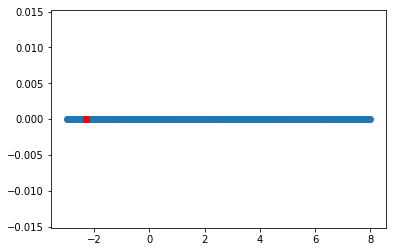

In [90]:
plot_marginal('Bogan', 'Assault - non-domestic violence')

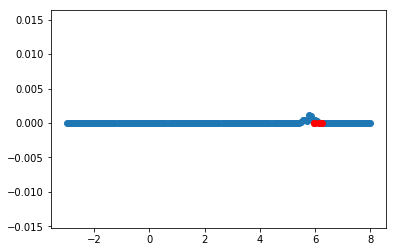

In [91]:
plot_marginal('Wollongong', 'Assault - non-domestic violence')

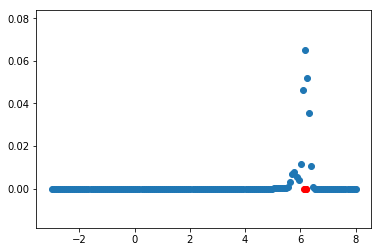

In [92]:
plot_marginal('Penrith', 'Assault - non-domestic violence')